<h1 style='color : orange'>What is a Decision Tree?</h1>

<ul>
<li>A decision tree is a tree-based supervised learning method used to predict the output of a target variable.</li>
<li>Supervised learning uses labeled data (data with known output variables) to make predictions with the help of regression and classification algorithms. Supervised learning algorithms act as a supervisor for training a model with a defined output variable. It learns from simple decision rules using the various data features.</li>
<li>Decision trees in Python can be used to solve both classification and regression problems—they are frequently used in determining odds. </li>
</ul>

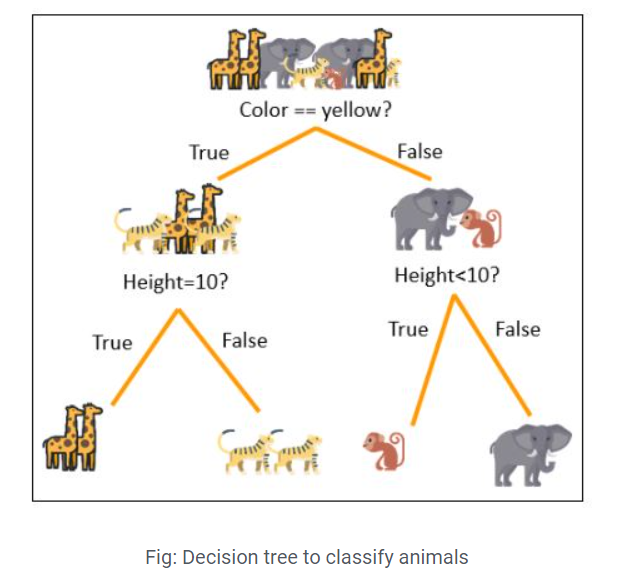

<h1 style='color:orange'>Advantages of Using Decision Trees</h1>

<ul>
<li>Decision trees are simple to understand, interpret, and visualize </li>
<li>They can effectively handle both numerical and categorical data</li>
<li>They can determine the worst, best, and expected values for several scenarios</li>
<li>Decision trees require little data preparation and data normalization</li>
<li>They perform well, even if the actual model violates the assumptions</li>
</ul>

<h1 style='color:orange'>Decision Tree Applications</h1>

<ol>
<li>A decision tree is used to determine whether an applicant is likely to default on a loan</li>
<li>It can be used to determine the odds of an individual developing a specific disease.</li>
<li>It can help ecommerce companies in predicting whether a consumer is likely to purchase a specific product.</li>
<li>Decision trees can also be used to find customer churn rates.</li>
</ol>

<h1 style='color:orange'>Important Terms Used in Decision Trees</h1>

<ol>
<li><b style='color: red'>Entropy:</b> Entropy is the measure of uncertainty or randomness in a data set. Entropy handles how a decision tree splits the data.
    calculated using formula ;</li>


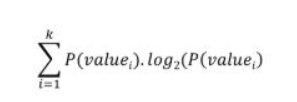


<ol>
<li><b style='color: red'> Information Gain:</b>The information gain measures the decrease in entropy after the data set is split.

It is calculated as follows:

IG( Y, X) = Entropy (Y) - Entropy ( Y | X)</li>
<li><b style='color: red'> Gini Index:</b> The Gini Index is used to determine the correct variable for splitting nodes. It measures how often a randomly chosen variable would be incorrectly identified. also a criterion for information gain</li>
<li><b style='color: red'>  Root Node: </b> The root node is always the top node of a decision tree. It represents the entire population or data sample, and it can be further divided into different sets.</li>
<li><b style='color: red'> Decision Node:</b>  Decision nodes are subnodes that can be split into different subnodes; they contain at least two branches.</li>
<li><b style='color: red'>  Leaf Node:</b>  A leaf node in a decision tree carries the final results. These nodes, which are also known as terminal nodes, cannot be split any further. </li>

</ol>

# Implementation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
ds=pd.read_csv('Social_Network_Ads.csv')
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# our gender column is chracter variable so we have to labelcode it
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
ds['Gender'] = le.fit_transform(ds['Gender'])
ds.head(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [6]:
X = ds.iloc[:, [2, 3]].values# age and salary
y = ds.iloc[:, 4].values# we are predicting whether purchases or not

In [7]:
# Split the data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [9]:
#4 Feature Scaling. Only scale the X_train and X_test. It does not #need Feature Scaling because it is a preprocessing step when 
#the algorithm is based on the Euclidean distance.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# printing
print("X_train",X_train)
print("y_train",y_train)
print("X_test",X_test)
print("y_test",y_test)

X_train [[ 0.59531408  1.95866234]
 [-0.71170063 -0.23323283]
 [ 0.22188131 -0.37556368]
 [-0.15155147  1.36087275]
 [-0.89841702 -0.9448871 ]
 [ 1.15546324 -0.74562391]
 [-1.83199895 -0.0624358 ]
 [-0.80505882  0.27915825]
 [ 0.3152395   0.05142888]
 [-0.15155147  2.1009932 ]
 [ 1.90232879 -0.91642093]
 [-1.27184979 -0.43249603]
 [-0.71170063 -0.60329305]
 [-1.0851334  -0.77409008]
 [-1.36520798 -0.11936814]
 [ 0.96874685  2.01559468]
 [-0.80505882  0.1368274 ]
 [ 1.24882144  1.81633149]
 [-0.33826785 -0.77409008]
 [ 1.90232879  0.87694784]
 [-0.43162605  1.2185419 ]
 [ 1.52889602  0.96234636]
 [-1.73864076 -1.40034584]
 [ 0.3152395  -0.51789454]
 [ 0.40859769  0.07989505]
 [ 0.87538866 -1.28648116]
 [ 1.7156124   1.78786532]
 [-0.15155147 -0.4609622 ]
 [-0.24490966 -0.91642093]
 [-1.0851334   0.30762442]
 [ 1.8089706  -0.29016517]
 [-0.52498424  0.44995528]
 [-0.05819327 -1.05875179]
 [-1.1784916   0.27915825]
 [-1.55192437 -0.0624358 ]
 [-1.73864076 -0.00550346]
 [ 0.12852311 -0.318

In [11]:
# Train the model using the decision tree classifier.
from sklearn.tree import DecisionTreeClassifier
# here max_depth and min_samples_leaf define pruning which is done to avoid  overfitting
classifier = DecisionTreeClassifier(criterion='entropy',random_state=7,max_depth=3,min_samples_leaf=5)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=7)

In [13]:
# Predict the test data set values using the model above.
y_pred = classifier.predict(X_test)
# comparing true and predicted value
print("y_test",y_test)
print("y_pred",y_pred)

y_test [1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0]
y_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
# Calculate the accuracy of the model using the accuracy score function.
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("confusion matrix : ",cm)
print("accuracy score : ",ac)

confusion matrix :  [[ 0 68]
 [ 0 32]]
accuracy score :  0.32


### well accuracy is not to well so we will code again without using pruning

In [15]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy',random_state=7)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [16]:
# Predict the test data set values using the model above.
y_pred = classifier.predict(X_test)
# comparing true and predicted value
print("y_test",y_test)
print("y_pred",y_pred)

y_test [1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0]
y_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
# Calculate the accuracy of the model using the accuracy score function.
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("confusion matrix : ",cm)
print("accuracy score : ",ac)

confusion matrix :  [[ 0 68]
 [ 0 32]]
accuracy score :  0.32


#### NOW USING GINI CRITERION

In [18]:
# Train the model using the decision tree classifier.
from sklearn.tree import DecisionTreeClassifier
# here max_depth and min_samples_leaf define pruning which is done to avoid  overfitting
classifier = DecisionTreeClassifier(criterion='gini',random_state=7,max_depth=3,min_samples_leaf=5)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=7)

In [19]:
# Predict the test data set values using the model above.
y_pred = classifier.predict(X_test)
# comparing true and predicted value
print("y_test",y_test)
print("y_pred",y_pred)

y_test [1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0]
y_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("confusion matrix : ",cm)
print("accuracy score : ",ac)

confusion matrix :  [[ 0 68]
 [ 0 32]]
accuracy score :  0.32


### gini without pruning

In [21]:
# Train the model using the decision tree classifier.
from sklearn.tree import DecisionTreeClassifier
# here max_depth and min_samples_leaf define pruning which is done to avoid  overfitting
classifier = DecisionTreeClassifier(criterion='gini',random_state=7)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

In [22]:
# Predict the test data set values using the model above.
y_pred = classifier.predict(X_test)
# comparing true and predicted value
print("y_test",y_test)
print("y_pred",y_pred)

y_test [1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0]
y_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("confusion matrix : ",cm)
print("accuracy score : ",ac)

confusion matrix :  [[ 0 68]
 [ 0 32]]
accuracy score :  0.32


# using another dataset

In [24]:
ds2=pd.read_csv('zoo.csv')
ds2

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [25]:
ds2.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [27]:
ds2=ds2.drop('animal_name',axis=1)
ds2.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [28]:
X = ds2.iloc[:80,:-1]
y = ds2.iloc[:80,-1]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [30]:
print("X_train",X_train)
print("y_train",y_train)
print("X_test",X_test)
print("y_test",y_test)

X_train     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
69     1         0     0     1         0        0         1        1   
43     0         1     1     0         1        0         0        0   
79     0         1     1     0         1        1         1        0   
21     0         1     1     0         1        1         0        0   
51     1         0     1     0         1        0         0        0   
26     0         0     1     0         0        1         1        1   
32     1         0     0     1         0        0         0        1   
33     0         1     1     0         1        1         1        0   
54     1         0     0     1         0        0         1        1   
71     0         1     1     0         0        0         1        0   
45     1         0     0     1         0        0         1        1   
10     1         0     0     1         0        0         1        1   
61     0         0     1     0         0        1       

In [39]:
classify = DecisionTreeClassifier(criterion ='gini').fit(X_train,y_train)

In [40]:
prediction = classify.predict(X_test)
print("y_test",y_test)
print("y_prediction",prediction)

y_test 62    3
36    1
60    4
17    1
41    2
12    4
27    1
15    7
40    6
2     4
37    2
13    7
74    1
30    6
49    1
63    1
18    4
22    1
20    2
77    7
Name: class_type, dtype: int64
y_prediction [5 1 4 1 2 4 1 7 6 4 2 7 1 6 1 1 4 1 2 7]


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, prediction)
ac = accuracy_score(y_test,prediction)
print("confusion matrix : ",cm)
print("accuracy score : ",ac)

confusion matrix :  [[7 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 3]]
accuracy score :  0.95


In [42]:
from matplotlib import pyplot as plt
from sklearn import tree
print(tree.export_text(classify))

|--- feature_3 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |--- class: 5
|   |   |--- feature_11 >  0.50
|   |   |   |--- class: 4
|   |--- feature_1 >  0.50
|   |   |--- class: 2
|--- feature_3 >  0.50
|   |--- class: 1



KeyError: 3

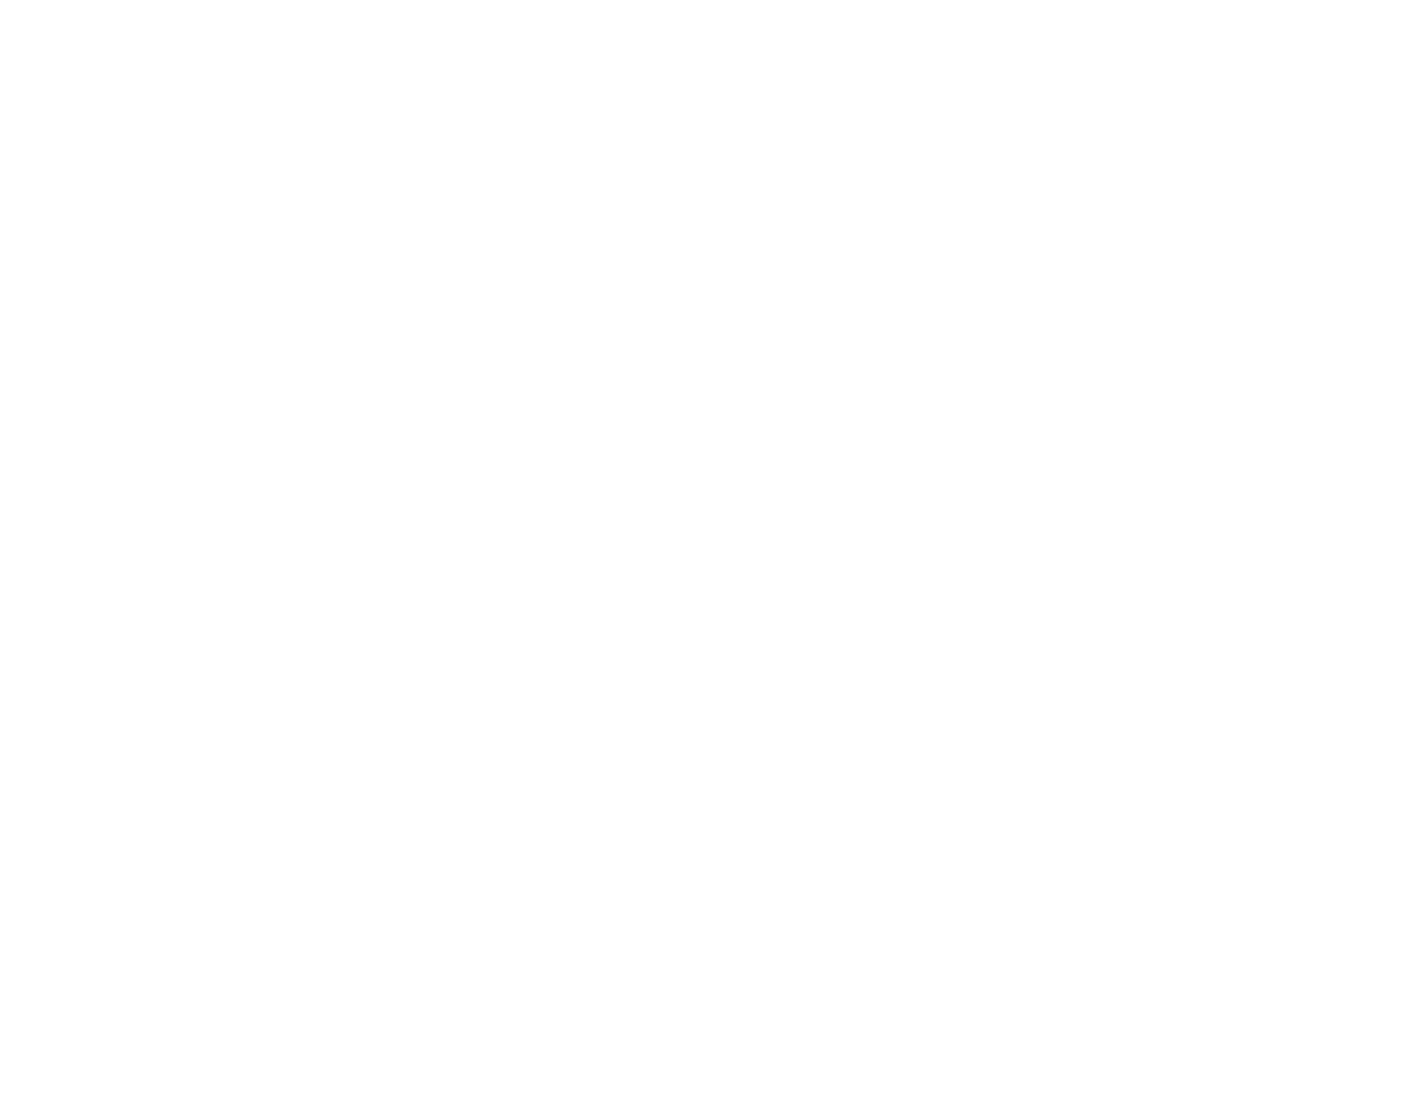

In [47]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classify, 
                   feature_names=X,  
                   class_names=y,
                   filled=True)